# Prediction Using Supervised Machine Learning

In [42]:
# filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

## Reading The Dataset For Further Analysis

In [4]:
# Setting working directory
os.chdir(R'C:\Users\TANIA DAS\Python_class\ML\Linear regression')

# Loading the CSV data into a DataFrame
Weatherdata=pd.read_csv('weatherHistory.csv')
print("Data is imported successfully")

Data is imported successfully


## Exploratory Data Analysis

In [5]:
Weatherdata.head() # Head of the data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
# Checking data dimension
Weatherdata.shape

(96453, 12)

In [6]:
# Viewing the columns of the data
Weatherdata.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
# Checking the column information
Weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
# Checking the structure of the data
Weatherdata.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [9]:
# Checking for missing values if any
Weatherdata.isnull().sum().sort_values(ascending=False)

Precip Type                 517
Formatted Date                0
Summary                       0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### Treating missing values

As we can see there is missing values only for the key 'Precip Type' so we will be treating it with the item having the highest mode

<AxesSubplot:xlabel='Precip Type', ylabel='count'>

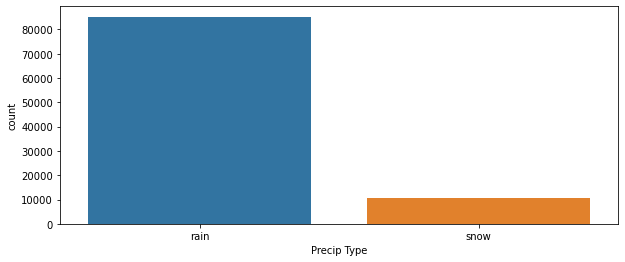

In [10]:
# Plotting the column 'Precip Type'
plt.subplots(figsize=(10,4))
sns.countplot(Weatherdata['Precip Type'])


Most occuring value/mode is rain.

In [11]:
#So filling the missing values with rain

Weatherdata["Precip Type"] = Weatherdata["Precip Type"].fillna('rain')

In [12]:
#make sure that all the missing values are imputed

Weatherdata.isnull().sum().any()

False

In [13]:
# Summary of all numerical data
Categorical=Weatherdata.describe()
display(Categorical)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Uncertain about the meaning or the importance of "Loud Cover" , and the data being all zeroes, we will drop it

In [14]:
#Drop "Loud Cover"
Weatherdata.drop("Loud Cover" , axis = 1,inplace = True)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


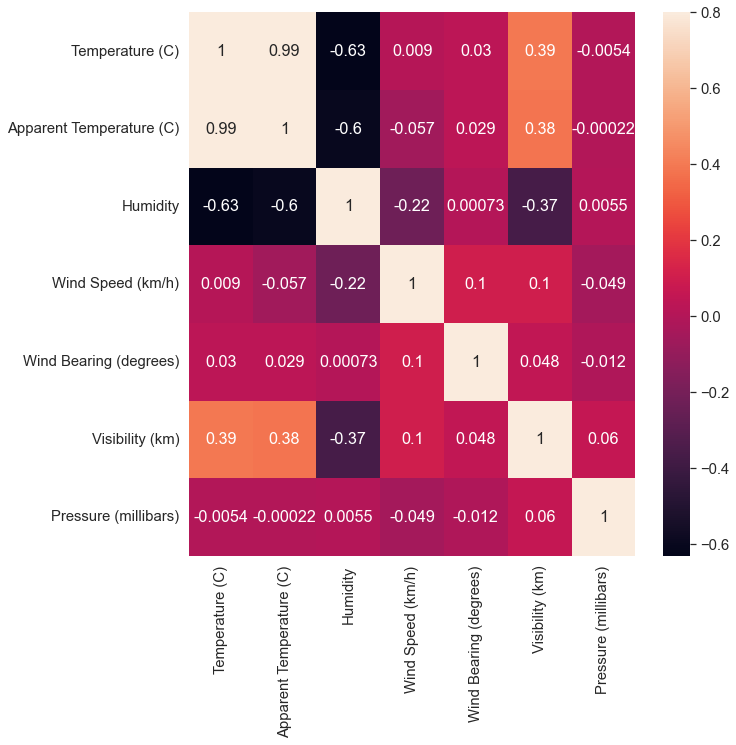

In [15]:
# Showing correlation between the variables
dataset=Weatherdata.iloc[:,[0,2,3,4,5,6,7,8,9]]
Cor_s=dataset.corr()
display(Cor_s)
# Plotting the correlation matrix using heatmap
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(10,10))
hm=sns.heatmap(Cor_s, annot = True,vmax=.8)

### Outliers Detection And Removing Them

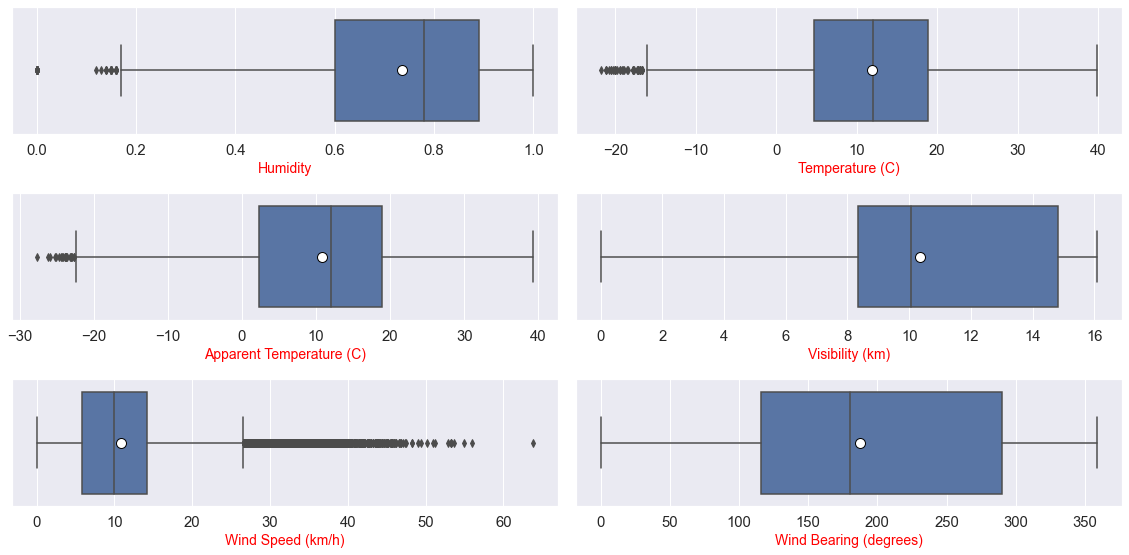

In [16]:
# plot graphs for numerical columns to check data distribution 

plt.figure(figsize=[16,8])
plt.subplot(3,2,1)
sns.boxplot(Weatherdata['Humidity'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Humidity', fontdict={'color':'red','fontsize':14})

plt.subplot(3,2,2)
sns.boxplot(Weatherdata['Temperature (C)'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Temperature (C)', fontdict={'color':'red','fontsize':14})

plt.subplot(3,2,3)
sns.boxplot(Weatherdata['Apparent Temperature (C)'],showmeans=True,meanprops={"marker":"o", "markerfacecolor":"white",  "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Apparent Temperature (C)', fontdict={'color':'red','fontsize':14})

plt.subplot(3,2,4)
sns.boxplot(Weatherdata['Visibility (km)'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"white",  "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Visibility (km)', fontdict={'color':'red','fontsize':14})

plt.subplot(3,2,5)
sns.boxplot(Weatherdata['Wind Speed (km/h)'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"white",  "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Wind Speed (km/h)', fontdict={'color':'red','fontsize':14})

plt.subplot(3,2,6)
sns.boxplot(Weatherdata['Wind Bearing (degrees)'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"white",  "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Wind Bearing (degrees)', fontdict={'color':'red','fontsize':14})


# Improve the spacing between subplots
plt.tight_layout()

There is a large difference between mean and median(50% value) for variable 'Humidity'. So we can say outliers are present.

In [17]:
#Finding outliers using z-score
outliers=[]
def detect_outlier(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers
outlier_data = detect_outlier(Weatherdata["Humidity"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [18]:
print(Weatherdata["Humidity"].quantile(0.10))
print(Weatherdata["Humidity"].quantile(0.90))

0.43
0.95


In [19]:
#Treating the outliers
Weatherdata["Humidity"] = np.where(Weatherdata["Humidity"] <0.43, 0.43,Weatherdata["Humidity"])
Weatherdata["Humidity"]= np.where(Weatherdata["Humidity"] >0.95, 0.95,Weatherdata["Humidity"])


Text(0.5, 0, 'Humidity')

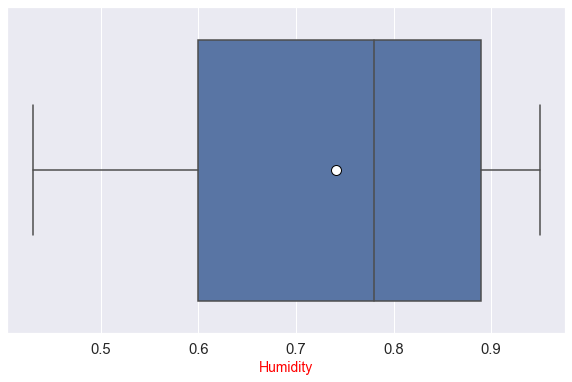

In [20]:
# Plotting boxplot after removing the outliers
plt.subplots(figsize=[10,6])
sns.boxplot(Weatherdata["Humidity"],showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Humidity', fontdict={'color':'red','fontsize':14})


## Data Visualization

### Categorical Unordered Univariate Analysis

In [21]:
cat_col = Weatherdata[['Summary','Precip Type']]

<AxesSubplot:xlabel='count', ylabel='Summary'>

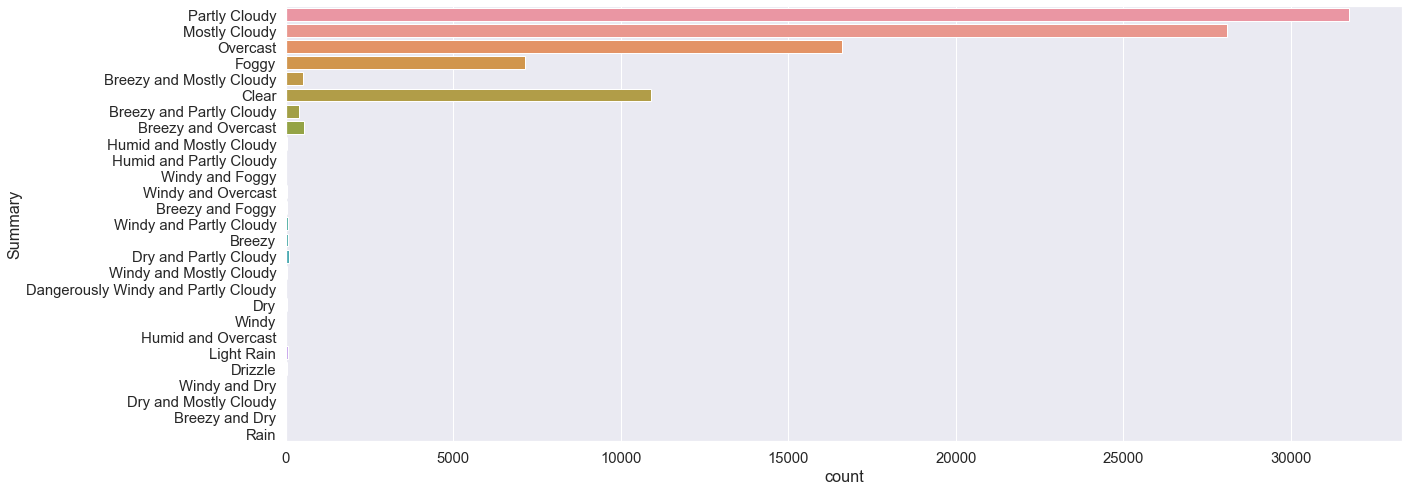

In [22]:
plt.subplots(figsize=(20,8))
sns.countplot(y=cat_col['Summary'])

Under the category summary,Partly Cloudy occured for the maximum number of times

<AxesSubplot:xlabel='count', ylabel='Precip Type'>

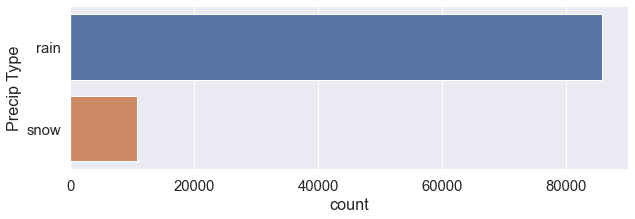

In [23]:
plt.subplots(figsize=(10,3))
sns.countplot(y=cat_col['Precip Type'])

Among the two precip type,rain has the highest count

### Bivariate Analysis

#### Numeric Analysis

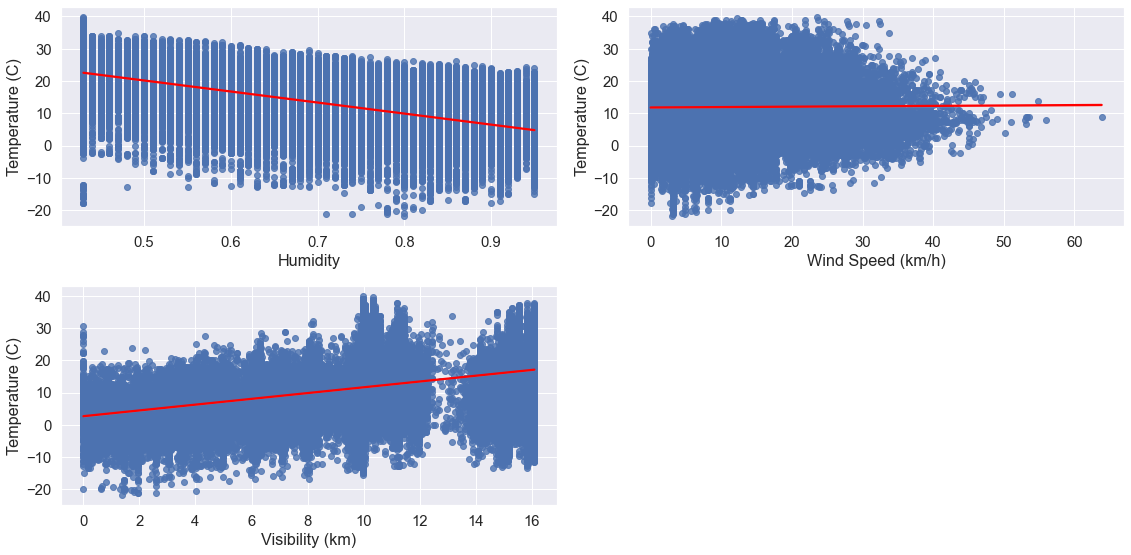

In [24]:
plt.figure(figsize=[16,8])
plt.subplot(2,2,1)
sns.regplot(x=Weatherdata['Humidity'],y=Weatherdata['Temperature (C)'],line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(x=Weatherdata['Wind Speed (km/h)'],y=Weatherdata['Temperature (C)'],line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(x=Weatherdata['Visibility (km)'],y=Weatherdata['Temperature (C)'],line_kws={"color": "red"})

# Improve the spacing between subplots
plt.tight_layout()

In the first subplot there is a negative relationship between temperature and humidity because as we know when temperature decreases,air become wet and thus humidity increases.

Other observations are that visibility increases with the increase in temprature, due to the summer having clearer skies and less fog and that wind speed is less in the summer relative to winter.


We will drop summary and daily summary since it has many levels.

In [43]:
Weatherdata=Weatherdata.drop(["Summary","Daily Summary"],axis=1)# Dropping two columns

In [62]:
Weatherdata.shape

(96453, 9)

## Preparing The Data For Modelling

In [45]:
# Creating the Independendent and Dependent Data Set
y= Weatherdata.iloc[:,[2]] # Dependent Data
X= Weatherdata.iloc[:,[3,4,5,6,7,8]] #Independent Data

Text(0.5, 0, 'Temperature')

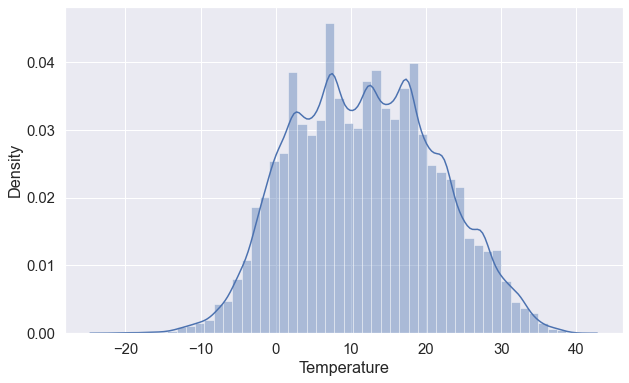

In [46]:
plt.figure(figsize=(10,6))
sns.distplot(y['Temperature (C)'])
plt.xlabel('Temperature')

The dependent variable Temperature is normally distributed.

The maximum distribution of temperature is between 10-20 range.

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


We are spliting the data on percentage basis i.e 80% of the data will go to train data and 20% of the data  will goto test data.

Train Data contains 77162 rows while Test data contains 19291  rows.

## Building the model

In [49]:
#Adding Intercept term to the model
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

Printing the model statistics

In [50]:
model=sm.OLS(y_train,X_train).fit() # Fitting the model
y_pred=model.predict(X_test) # Predicting the testset results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.271e+06
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:06:33   Log-Likelihood:            -1.0606e+05
No. Observations:               77162   AIC:                         2.121e+05
Df Residuals:                   77155   BIC:                         2.122e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.7286      0.041     67.061      0.000       2.649       2.808
Apparent Temperature (C)     0.8751      0.000   2052.169      0.000       0.874       0.876
Humidity                    -1.2998      0.026    -49.057      0.000      -1.352      -1.248
Wind Speed (km/h)            0.0812      0.001    151.927      0.000       0.080       0.082
Wind Bearing (degrees)      -0.0004   3.24e-05    -12.793      0.000      -0.000      -0.000
Visibility (km)              0.0096      0.001     10.534      0.000       0.008       0.011
Pressure (millibars)        -0.0002   2.99e-05     -7.703      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     2138.932   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2630.243
Skew:                          -0.350   Prob(JB):                         0.00
Kurtosis:                       3.572   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
model.params # Extracting the coefficients

const                       2.728576
Apparent Temperature (C)    0.875062
Humidity                   -1.299778
Wind Speed (km/h)           0.081195
Wind Bearing (degrees)     -0.000414
Visibility (km)             0.009611
Pressure (millibars)       -0.000230
dtype: float64

In [52]:
# Checking the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

   VIF Factor                  features
0  139.585417                     const
1    1.757863  Apparent Temperature (C)
2    1.813931                  Humidity
3    1.151888         Wind Speed (km/h)
4    1.017392    Wind Bearing (degrees)
5    1.231409           Visibility (km)
6    1.007634      Pressure (millibars)


The acceptable limit of VIF factor is <1.7.Since the independent variable 'Humidity' has Vif factor greater than the acceptable limit.We will drop the variable and re-train the model

In [53]:
# Preparing the train and test dataset by dropping Humidity for the second round of modelling
New_X_train=X_train.drop(["Humidity"],axis = 1)
New_X_test=X_test.drop(["Humidity"],axis = 1)

In [54]:
# Fitting and predicting the test results for the second round
model1=sm.OLS(y_train,New_X_train).fit() # Fitting the model
y_pred1=model1.predict(New_X_test) # Predicting the test set results
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.479e+06
Date:                Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:06:36   Log-Likelihood:            -1.0725e+05
No. Observations:               77162   AIC:                         2.145e+05
Df Residuals:                   77156   BIC:                         2.146e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.4926      0.032     46.006      0.000       1.429       1.556
Apparent Temperature (C)     0.8870      0.000   2496.577      0.000       0.886       0.888
Wind Speed (km/h)            0.0896      0.001    174.252      0.000       0.089       0.091
Wind Bearing (degrees)      -0.0005   3.28e-05    -15.915      0.000      -0.001      -0.000
Visibility (km)              0.0172      0.001     18.792      0.000       0.015       0.019
Pressure (millibars)        -0.0002   3.04e-05     -7.744      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     1026.186   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1367.139
Skew:                          -0.188   Prob(JB):                    1.35e-297
Kurtosis:                       3.533   Cond. No.                     9.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

My model achieved a R-square of 99% which means 99% of  variation of the dependent variable is being explained by the inependent variables.Higher is my R-square the better is my model.

R-square and Adjusted R-square are same.So  we can say that our fitted well as the criteria for the model to fit well is that the difference betwween theR-square and Adjusted R-square should be minimum.

The model achieved satifiess the Durbin Watson Test(i.e DW should be equal to 2).Therefore we can say that there is no problem of auto-correlation in the model

In [55]:
model1.params # Extracting the coefficients

const                       1.492553
Apparent Temperature (C)    0.887018
Wind Speed (km/h)           0.089589
Wind Bearing (degrees)     -0.000522
Visibility (km)             0.017161
Pressure (millibars)       -0.000235
dtype: float64

In [56]:
# Checking the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(New_X_train.values, j) for j in range(New_X_train.shape[1])]
vif["features"] = New_X_train.columns
print(vif)

   VIF Factor                  features
0   86.059297                     const
1    1.183520  Apparent Temperature (C)
2    1.033815         Wind Speed (km/h)
3    1.012702    Wind Bearing (degrees)
4    1.196369           Visibility (km)
5    1.007623      Pressure (millibars)


Since all our independent variables acheived VIF factor less than 1.7.So we can say that our model has no problem of
multicollinearity(i.e High correlation between explanatory variables) 

In [57]:
#Root Mean Square Error
from sklearn import metrics
import math
RMSE=math.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print("The RMSE of our model is",RMSE)

The RMSE of our model is 0.9710819002420927


We have a loss of 0.9710819002420927, which is quite small so our model did quite well

Let's compare our predicitions against our targets to see if we got a correlated trend

### Actual Vs Prdicted

Text(0.5, 1.0, 'Actual Temperature vs Predicted Temperature')

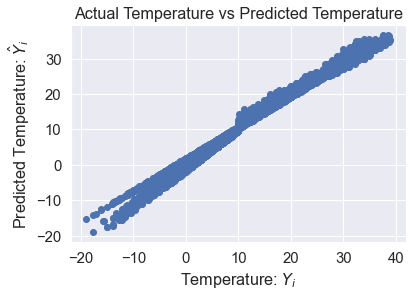

In [58]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Temperature: $Y_i$")
plt.ylabel("Predicted Temperature: $\hat{Y}_i$")
plt.title("Actual Temperature vs Predicted Temperature")

We got a positive correlated trend, so our model did quite well